In [3]:
import tensorflow.keras as tk
import keras
mnist = tk.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 3s 0us/step


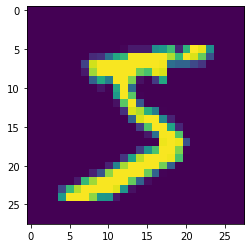

5


In [4]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
plt.show()

print(y_train[0])

In [5]:
#reshape
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

input_shape = (28, 28, 1)

#normalize
x_train = x_train.astype('float32')
x_train /= 255

x_test = x_test.astype('float32')
x_test /= 255

In [6]:
print(y_train[0])

y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

print(y_train[0])

5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [8]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=input_shape))
model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(keras.layers.Dropout(0.25))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(10, activation='softmax'))

In [10]:
model.compile(loss=tk.losses.categorical_crossentropy, optimizer=keras.optimizers.Adadelta(), metrics=['accuracy'])
model.fit(x_train, y_train, batch_size=128, epochs=20, validation_data=(x_test, y_test))

Epoch 1/20
469/469 [==============================] - 92s 191ms/step - loss: 2.2872 - accuracy: 0.1398 - val_loss: 2.2490 - val_accuracy: 0.2586
Epoch 2/20
469/469 [==============================] - 80s 170ms/step - loss: 2.2264 - accuracy: 0.2527 - val_loss: 2.1796 - val_accuracy: 0.4631
Epoch 3/20
469/469 [==============================] - 80s 170ms/step - loss: 2.1563 - accuracy: 0.3550 - val_loss: 2.0903 - val_accuracy: 0.6033
Epoch 4/20
469/469 [==============================] - 80s 170ms/step - loss: 2.0596 - accuracy: 0.4486 - val_loss: 1.9675 - val_accuracy: 0.6715
Epoch 5/20
469/469 [==============================] - 80s 171ms/step - loss: 1.9320 - accuracy: 0.5156 - val_loss: 1.8047 - val_accuracy: 0.7103
Epoch 6/20
469/469 [==============================] - 80s 170ms/step - loss: 1.7753 - accuracy: 0.5634 - val_loss: 1.6085 - val_accuracy: 0.7357
Epoch 7/20
469/469 [==============================] - 82s 175ms/step - loss: 1.5964 - accuracy: 0.6026 - val_loss: 1.3970 - val_ac

In [11]:
print(model.evaluate(x_test, y_test))

313/313 [==============================] - 7s 23ms/step - loss: 0.4740 - accuracy: 0.8742
[0.47396206855773926, 0.8741999864578247]
